In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Print all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We consider a stock price at a given point in time as a vector

$$x_i = \begin{pmatrix}
    low \\ 
    high \\ 
    open \\ 
    close \\
    vwap \\
    volume
\end{pmatrix}$$

And a collection of historical prices for a stock as a matrix

$$\bf{x} = \begin{pmatrix}
    x_0^T \\ 
    x_1^T \\
    . \\
    . \\
    . \\
    x_n^T
\end{pmatrix}
=
\begin{pmatrix}
    low(x_0) & high(x_0) & open(x_0) & close(x_0) & vwap(x_0) & volume(x_0) \\
    low(x_1) & high(x_1) & open(x_1) & close(x_1) & vwap(x_1) & volume(x_1) \\
    . & . & . & . & . & . \\
    low(x_n) & high(x_n) & open(x_n) & close(x_n) & vwap(x_n) & volume(x_n) \\
\end{pmatrix}
$$

Firstly, this keeps all data well organized and contained within a single object. Secondly, it allows for studies to be described in the context of linear algebra operations.

For instance, the computation of $$(high + low + open + close) / 4$$ can be described as

$$\frac{(high + low + open + close)}{4} = \bf{x} \cdot \frac{1}{4} \begin{pmatrix}
  1 \\
  1 \\
  1 \\
  1 \\
  0 \\
  0
\end{pmatrix}
$$

In [22]:
# Compute (high + low + open + close) / 4 using matrix operations
data = np.arange(0, 36).reshape(6,6)
hloc = np.array([1, 1, 1, 1, 0, 0]).reshape(6, 1) / 4

data
hloc
data @ hloc



array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

array([[0.25],
       [0.25],
       [0.25],
       [0.25],
       [0.  ],
       [0.  ]])

array([[ 1.5],
       [ 7.5],
       [13.5],
       [19.5],
       [25.5],
       [31.5]])

In this case we can compute the desired result through matrix operations rather than having to write a complicated algorithm. 

We also have the flexibility to apply an operation to multiple features of a price history at once. Suppose that we want to compute a gradient to analyze changes in each price feature over time. We can compute a single gradient that will be valid for each feature.

In [29]:
np.gradient(data, axis=0)

array([[6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.]])

array([6., 6., 6., 6., 6., 6.])

## Divergence

We can easily determine correlations between past prices and study values to search for divergences between the study and price during future trading. 


In [89]:
data = np.arange(0, 36*3, 3).reshape(6,6)
study = data
data = data * 2
study[3, 0] = 58
div = np.diff(data, axis=0) / np.diff(study, axis=0)

data
study
div
np.mean(div, axis=0)
np.std(div, axis=0)

array([[  0,   6,  12,  18,  24,  30],
       [ 36,  42,  48,  54,  60,  66],
       [ 72,  78,  84,  90,  96, 102],
       [108, 114, 120, 126, 132, 138],
       [144, 150, 156, 162, 168, 174],
       [180, 186, 192, 198, 204, 210]])

array([[  0,   3,   6,   9,  12,  15],
       [ 18,  21,  24,  27,  30,  33],
       [ 36,  39,  42,  45,  48,  51],
       [ 58,  57,  60,  63,  66,  69],
       [ 72,  75,  78,  81,  84,  87],
       [ 90,  93,  96,  99, 102, 105]])

array([[2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        ],
       [2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        ],
       [1.63636364, 2.        , 2.        , 2.        , 2.        ,
        2.        ],
       [2.57142857, 2.        , 2.        , 2.        , 2.        ,
        2.        ],
       [2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        ]])

array([2.04155844, 2.        , 2.        , 2.        , 2.        ,
       2.        ])

array([0.30004216, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

The resultant array tells us that on average a two fold increase in the value of a study should be associated with a four fold increase in price. We can apply this to future values of the study and price to note when the two diverge. Divergence of price and study trends may indicate that the price trend is nearing a reversal

## Support and Resistance

We can use peak detection algorithms to identify support and resistance levels

array([ 4, 20, 73, 84])

array([50])

<function matplotlib.pyplot.show(*args, **kw)>

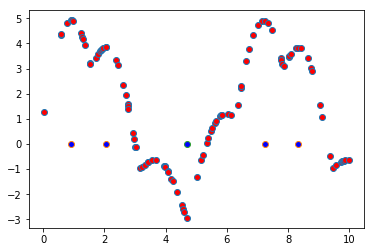

In [136]:
import scipy.signal as sig

x = np.random.uniform(0, 10, 100)
x = np.sort(x)
y = 3*np.sin(x) + 2*np.abs(np.sin(2 * x)) + np.cos(x)
peaks = sig.find_peaks(y, height=2)[0]
peaks2 = sig.find_peaks(y*-1, height=2)[0]
peaks
peaks2

plt.plot(x, y, linestyle='none', marker='o', markerfacecolor='r')
plt.plot(x[peaks], [0] * len(peaks), linestyle='none', marker='o', markerfacecolor='b')
plt.plot(x[peaks2], [0] * len(peaks2), linestyle='none', marker='o', markerfacecolor='b')
plt.show